In [1]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## konlpy 예제

In [3]:
okt = Okt()

In [4]:
text = "안녕하세요 오늘 날씨가 덥네요. 놀러가고 싶어요"

In [5]:
# 형태소 분석
okt.morphs(text)

['안녕하세요', '오늘', '날씨', '가', '덥네요', '.', '놀러', '가고', '싶어요']

In [6]:
# 동사원형
okt.morphs(text, stem=True)

['안녕하다', '오늘', '날씨', '가', '덥다', '.', '놀다', '가다', '싶다']

In [7]:
# 명사추출
okt.nouns(text)

['오늘', '날씨']

In [16]:
okt.pos(text)

[('안녕하세요', 'Adjective'),
 ('오늘', 'Noun'),
 ('날씨', 'Noun'),
 ('가', 'Josa'),
 ('덥네요', 'Adjective'),
 ('.', 'Punctuation'),
 ('놀러', 'Verb'),
 ('가고', 'Verb'),
 ('싶어요', 'Verb')]

In [18]:
# 동사만 추출 
for word, type_ in okt.pos(text):
    if type_ == 'Verb':
        print(word)

놀러
가고
싶어요


## mecab

In [9]:
from konlpy.tag import Mecab

In [11]:
Mecab.morphs(text)

TypeError: morphs() missing 1 required positional argument: 'phrase'

## komoran

In [13]:
from konlpy.tag import Komoran

In [14]:
ko = Komoran()

In [15]:
ko.morphs(text)

['안녕하세요', '오늘', '날씨', '가', '덥', '네요', '.', '놀', '러', '가', '고', '싶', '어요']

In [24]:
from konlpy.corpus import kolaw

자연어 처리할때 우리가 수집하는 데이터 셋 ? 말뭉치(Corpus)

In [26]:
kolaw.open('constitution.txt').read()

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

In [27]:
# 데이터 받아오기 
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x2868894dee0>)

In [28]:
# 파일 읽기
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [29]:
type(train_data)

pandas.core.frame.DataFrame

In [30]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [31]:
train_data.shape

(150000, 3)

In [32]:
train_data[train_data.document.duplicated()]

,id,document,label
1058,5890638,4,0
1097,2062443,쵝오,1
1248,3502685,최고,1
1483,775332,최고,1
1707,8009134,재밌다,1
...,...,...,...
149919,6502490,짱,1
149949,3924716,OO 영화,0
149960,6368431,지루하다,0
149966,6735753,1,0


In [33]:
# 중복 데이터 삭제 
train_data.drop_duplicates(subset=['document'], inplace=True)

In [34]:
train_data.shape

(146183, 3)

In [35]:
# 0, 1의 비율 보기 
train_data.label.value_counts()

0    73342
1    72841
Name: label, dtype: int64

In [37]:
train_data.label.value_counts() / train_data.shape[0] * 100

0    50.171361
1    49.828639
Name: label, dtype: float64

<AxesSubplot:>

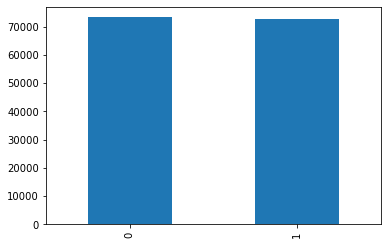

In [38]:
# 시각화 
train_data['label'].value_counts().plot(kind = 'bar')

In [39]:
# 결측치 확인 
train_data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [40]:
train_data[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [41]:
# 결측치 삭제 
train_data.dropna(inplace=True)

# 정규식을 사용한 텍스트 처리

In [42]:
# 정규식
eng_text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
print(re.sub(r'[^a-zA-Z ]', '', eng_text))

do you expect people to read the FAQ etc and actually accept hard atheism


In [43]:
hangul_text = "ㅋㅋㅋ 재밌네요.. ㅎㅎㅎ ^^"

In [44]:
re.sub("[^가-힣]", "", hangul_text)

'재밌네요'

In [45]:
# ㄱ ~ ㅎ ㅏ ~~ ㅣ 가 ~ 힣 
hangul_text = "ㅋㅋㅋ 재밌네요.. ㅎㅎㅎ ㅏㅏ!! ^^"
re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", hangul_text)

'ㅋㅋㅋ 재밌네요 ㅎㅎㅎ ㅏㅏ '

In [48]:
train_data['document'] = train_data['document'].str.replace("[^가-힣 ]", "")

C:\Users\82103\AppData\Local\Temp/ipykernel_12604/3200219692.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^가-힣 ]", "")


In [49]:
train_data['document']

0                                         아 더빙 진짜 짜증나네요 목소리
1                                흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                                 교도소 이야기구먼 솔직히 재미는 없다평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
                                ...                        
149995                                      인간이 문제지 소는 뭔죄인가
149996                                           평점이 너무 낮아서
149997                        이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다
149998                           청춘 영화의 최고봉방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 146182, dtype: object

In [50]:
train_data.head(3)

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [57]:
# ' '를 리뷰로 남긴 사람들..
train_data[train_data.document == ' ']

,id,document,label
1549,7246718,,1
6254,5242262,,0
7580,5350096,,1
9676,7092984,,1
10766,8085167,,1
...,...,...,...
142547,7773048,,1
143030,7348559,,0
144644,6671721,,1
145019,9941597,,1


In [58]:
# ' ' 데이터를 결측치로 변경 
train_data['document'] = train_data['document'].replace(' ' , np.nan)

In [59]:
train_data = train_data.dropna()

In [60]:
train_data

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
...,...,...,...
149995,6222902,인간이 문제지 소는 뭔죄인가,0
149996,8549745,평점이 너무 낮아서,1
149997,9311800,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
149998,2376369,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,1


# 토큰화

불용어 -> 쓸데없는 단어들 의미없는 것들 예를 들면 뷁

In [61]:
# 불용어 
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [62]:
okt.morphs(train_data.iloc[0,1], stem=True)

['아', '더빙', '진짜', '짜증나다', '목소리']

In [63]:
X_train = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████| 146085/146085 [08:56<00:00, 272.51it/s]


## 후처리
* 시작 공백이 2개 이상 데이터를 삭제하지 않았기 때문에 후처리에서 삭제

전처리과정이 오래걸리면 다시 전처리하기 힘드니
후처리를 하는게 좋을수도 있다.
하지만 후처리는 안하는게 좋다

In [109]:
# 후처리...
# 시작 공백이 2개 이상 데이터를 삭제하지 않았기 때문에.. 후처리에서 삭제
tmp = pd.DataFrame(X_train)
tmp2 = tmp.dropna(how='all')
train_df = tmp2.join(train_data.label.reset_index(drop=True))
X_train2 = [] 
for _, row in train_df.iterrows():
    X_train2.append([x for x in row.tolist()[:-1] if x != None])

In [88]:
train_data.shape

(146085, 3)

In [89]:
train_data.label.reset_index(drop=True)

0         0
1         1
2         0
3         0
4         1
         ..
146080    0
146081    1
146082    0
146083    1
146084    0
Name: label, Length: 146085, dtype: int64

처리하지 못한 데이터 후처리

In [90]:
tmp = pd.DataFrame(X_train)

In [91]:
tmp.shape

(146085, 70)

In [92]:
tmp2 = tmp.dropna(how='all')

In [93]:
train_df = tmp2.join(train_data.label.reset_index(drop=True))

In [94]:
train_df.shape

(145234, 71)

In [95]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,label
0,아,더빙,진짜,짜증나다,목소리,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0
1,흠,포스터,보고,초딩,영화,줄,오버,연기,조차,가볍다,...,None,None,None,None,None,None,None,None,None,1
2,너,무재,밓었,다그,래서,보다,추천,다,None,None,...,None,None,None,None,None,None,None,None,None,0
3,교도소,이야기,구먼,솔직하다,재미,없다,평점,조정,None,None,...,None,None,None,None,None,None,None,None,None,0
4,사이,몬페,그,익살스럽다,연기,돋보이다,영화,스파이더맨,에서,늙다,...,None,None,None,None,None,None,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146080,인간,문제,지,소,뭔,죄인,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0
146081,평점,너무,낮다,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,1
146082,게,뭐,요,한국인,거들다,먹거리,고,필리핀,혼혈,착하다,...,None,None,None,None,None,None,None,None,None,0
146083,청춘,영화,최고봉,방황,우울하다,날,자화상,None,None,None,...,None,None,None,None,None,None,None,None,None,1


In [98]:
X_train2 = []
for _, row in train_df.iterrows():
    X_train2.append([x for x in row.tolist() if x != None])

In [99]:
X_train2

[['아', '더빙', '진짜', '짜증나다', '목소리', 0],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다', 1],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다', 0],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정', 0],
 ['사이',
  '몬페',
  '그',
  '익살스럽다',
  '연기',
  '돋보이다',
  '영화',
  '스파이더맨',
  '에서',
  '늙다',
  '보이다',
  '커스틴',
  '던스트',
  '너무나도',
  '이쁘다',
  '보이다',
  1],
 ['막',
  '걸음',
  '마',
  '떼다',
  '세',
  '부터',
  '초등학교',
  '학년',
  '생인',
  '살다',
  '영화',
  '별',
  '반개',
  '아깝다',
  '움',
  0],
 ['원작', '긴장감', '을', '제대로', '살리다', 0],
 ['별',
  '반개',
  '아깝다',
  '욕',
  '나오다',
  '이응경',
  '길용우',
  '연',
  '기',
  '생활',
  '몇',
  '년',
  '인지',
  '정말',
  '발',
  '로',
  '해도',
  '그것',
  '보단',
  '낫다',
  '납치',
  '감금',
  '만',
  '반복',
  '반복',
  '드라마',
  '가족',
  '없다',
  '연기',
  '못',
  '사람',
  '만',
  '모',
  '엿',
  '네',
  0],
 ['액션', '없다', '재미', '있다', '몇', '안되다', '영화', 1],
 ['왜케',
  '평점',
  '낮다',
  '꽤',
  '볼',
  '만',
  '데',
  '헐리우드',
  '식',
  '화려하다',
  '너무',
  '길들이다',
  '있다',
  1],
 ['인피니트', '짱', '이다', '진짜', '짱', '이

## 테스트 데이터

In [110]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^가-힣 ]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48230


C:\Users\82103\AppData\Local\Temp/ipykernel_12604/2059555682.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^가-힣 ]","") # 정규 표현식 수행
C:\Users\82103\AppData\Local\Temp/ipykernel_12604/2059555682.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경


In [97]:
X_test = []
for sentence in tqdm(test_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|███████████████████████████████████████████████████████████████████████████| 48230/48230 [04:16<00:00, 188.31it/s]


In [100]:
X_test[1]

['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다']

# 정수 인코딩

In [111]:
tokenizer = Tokenizer()

In [112]:
tokenizer.fit_on_texts(X_train2)

In [113]:
tokenizer.word_index

{'영화': 1,
 '보다': 2,
 '을': 3,
 '없다': 4,
 '이다': 5,
 '있다': 6,
 '좋다': 7,
 '너무': 8,
 '다': 9,
 '정말': 10,
 '되다': 11,
 '재밌다': 12,
 '적': 13,
 '만': 14,
 '같다': 15,
 '진짜': 16,
 '로': 17,
 '아니다': 18,
 '않다': 19,
 '점': 20,
 '에서': 21,
 '만들다': 22,
 '나오다': 23,
 '연기': 24,
 '것': 25,
 '평점': 26,
 '내': 27,
 '최고': 28,
 '그': 29,
 '나': 30,
 '안': 31,
 '인': 32,
 '스토리': 33,
 '생각': 34,
 '못': 35,
 '왜': 36,
 '드라마': 37,
 '게': 38,
 '감동': 39,
 '사람': 40,
 '보고': 41,
 '이렇다': 42,
 '말': 43,
 '고': 44,
 '아깝다': 45,
 '더': 46,
 '배우': 47,
 '때': 48,
 '감독': 49,
 '아': 50,
 '거': 51,
 '그냥': 52,
 '재미있다': 53,
 '요': 54,
 '재미': 55,
 '시간': 56,
 '내용': 57,
 '뭐': 58,
 '까지': 59,
 '중': 60,
 '주다': 61,
 '자다': 62,
 '하고': 63,
 '지루하다': 64,
 '재미없다': 65,
 '네': 66,
 '쓰레기': 67,
 '수': 68,
 '모르다': 69,
 '가다': 70,
 '들다': 71,
 '그렇다': 72,
 '싶다': 73,
 '지': 74,
 '작품': 75,
 '사랑': 76,
 '알다': 77,
 '하나': 78,
 '다시': 79,
 '마지막': 80,
 '볼': 81,
 '이건': 82,
 '정도': 83,
 '저': 84,
 '완전': 85,
 '오다': 86,
 '많다': 87,
 '처음': 88,
 '장면': 89,
 '액션': 90,
 '주인공': 91,
 '이렇게': 92,
 '안되다'

In [114]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 43070
등장 빈도가 2번 이하인 희귀 단어의 수: 23850
단어 집합에서 희귀 단어의 비율: 55.37497097747852
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.865390985670842


In [115]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 19221


In [116]:
tokenizer = Tokenizer(vocab_size)

In [117]:
tokenizer.fit_on_texts(X_train2)

In [118]:
X_train2[0]

['아', '더빙', '진짜', '짜증나다', '목소리']

In [120]:
X_train22 = tokenizer.texts_to_sequences(X_train2)

In [121]:
X_test22 = tokenizer.texts_to_sequences(X_test)

In [122]:
X_train22[0]

[50, 445, 16, 253, 649]

In [123]:
train_df.label

0         0
1         1
2         0
3         0
4         1
         ..
146080    0
146081    1
146082    0
146083    1
146084    0
Name: label, Length: 145234, dtype: int64

In [124]:
np.array(train_df.label)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [125]:
y_train = np.array(train_df.label)

In [126]:
y_test = np.array(test_data.label)

## 빈 샘플 제거

In [131]:
drop_train = [index for index, sentence in enumerate(X_train22) if len(sentence) < 1]

In [132]:
drop_train[:5]

[28, 319, 414, 1148, 1346]

In [133]:
len(drop_train)

250

In [135]:
X_train = np.delete(X_train22, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

D:\anaconda\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [136]:
print(len(X_train))
print(len(y_train))

144984
144984


## 패딩

리뷰의 최대 길이 : 68
리뷰의 평균 길이 : 10.645781603487281


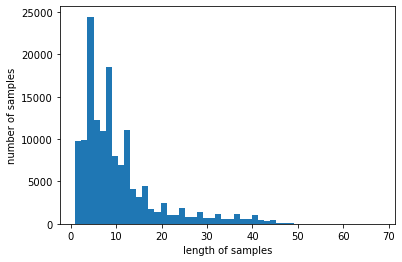

In [137]:
# 리뷰 길이 통계 
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [138]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [139]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.4490426529824


In [142]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test22, maxlen=max_len)

In [143]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  50,
       445,  16, 253, 649])

In [144]:
len(X_train[0])

30

# 모델 생성 및 훈련 

In [145]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1813/1813 [==============================] - ETA: 0s - loss: 0.3920 - acc: 0.8216
Epoch 1: val_acc improved from -inf to 0.83995, saving model to best_model.h5
1813/1813 [==============================] - 93s 48ms/step - loss: 0.3920 - acc: 0.8216 - val_loss: 0.3623 - val_acc: 0.8399
Epoch 2/15
1812/1813 [============================>.] - ETA: 0s - loss: 0.3284 - acc: 0.8577
Epoch 2: val_acc improved from 0.83995 to 0.85440, saving model to best_model.h5
1813/1813 [==============================] - 113s 63ms/step - loss: 0.3284 - acc: 0.8577 - val_loss: 0.3347 - val_acc: 0.8544
Epoch 3/15
1813/1813 [==============================] - ETA: 0s - loss: 0.3024 - acc: 0.8721
Epoch 3: val_acc improved from 0.85440 to 0.85857, saving model to best_model.h5
1813/1813 [==============================] - 94s 52ms/step - loss: 0.3024 - acc: 0.8721 - val_loss: 0.3289 - val_acc: 0.8586
Epoch 4/15
1117/1813 [=================>............] - ETA: 39s - loss: 0.2839 - acc: 0.8816

KeyboardInterrupt: 

In [146]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [147]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1508/1508 [==============================] - 14s 9ms/step - loss: 0.3360 - acc: 0.8539

 테스트 정확도: 0.8539


In [148]:
sentiment_predict('점심 먹자')

55.64% 확률로 부정 리뷰입니다.

